# Training and Visualizing a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin, cos
iris = load_iris()

In [2]:
iris 

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X_iris = iris.data[:, 2:] # petal length and width
y_iris = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [5]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_clf, X_iris, y_iris, scoring='accuracy', cv=3)

scores

array([0.96, 0.92, 0.92])

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file='iris_tree.dot',
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names, rounded=True, filled=True)

### Sau khi có ảnh thì chúng ta có thể convert qua đường link này
link: https://onlineconvertfree.com/convert-format/dot-to-png/

# Making Predictions

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
len(X_iris)

150

In [9]:
from matplotlib.colors import ListedColormap

def decision_boundaties(tree_clf, X, y, axes=[0, 7.5, 0, 3], plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree_clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    if plot_training:
        plt.plot(X[:,0][y==0], X[:,1][y==0],'yo', label='setosa')
        plt.plot(X[:,0][y==1], X[:,1][y==1],'bs', label='versicolor')
        plt.plot(X[:,0][y==2], X[:,1][y==2],'g^', label='virginica')
    plt.axis(axes)



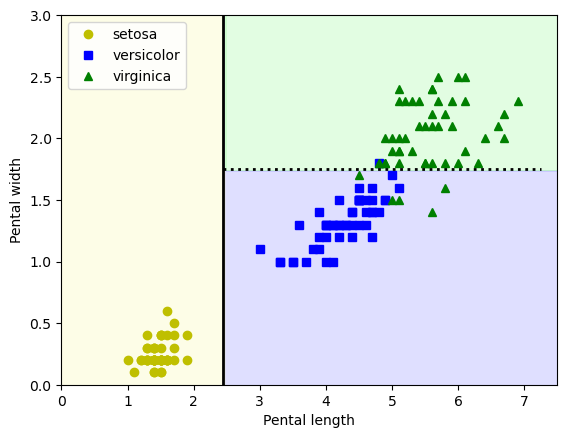

In [10]:
decision_boundaties(tree_clf, X_iris, y_iris, [0, 7.5, 0, 3])

plt.xlabel('Pental length')
plt.ylabel('Pental width')
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth=2)
plt.plot([2.45, 7.25],[1.75, 1.75], 'k:', linewidth=2)
plt.legend()

In [11]:
# Xác xuất của mổi điểm trong hình chữ nhật là giống nhau

# Estimating Class Probabilities

In [12]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [13]:
tree_clf.predict([[5, 1.5]])

array([1])

In [14]:
iris.target_names[1]

'versicolor'

# The CART Training Algorithm

# Computational Complexity

# Gini or Entropy

# Regularization Hyperparameters

In [15]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=53)

In [20]:
tree_clf_no_reg = DecisionTreeClassifier(random_state=42).fit(X, y)
tree_clf_reg = DecisionTreeClassifier(min_samples_leaf=4,random_state=42).fit(X, y)

<function matplotlib.pyplot.show(close=None, block=None)>

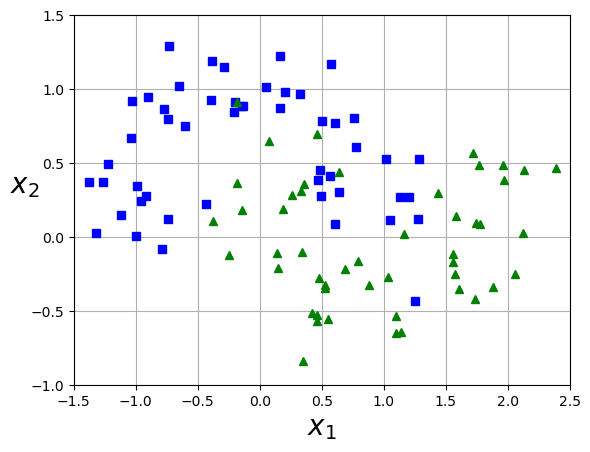

In [21]:
def plot_data_set(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0],'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_data_set(X, y, [-1.5, 2.5, -1, 1.5])
plt.show

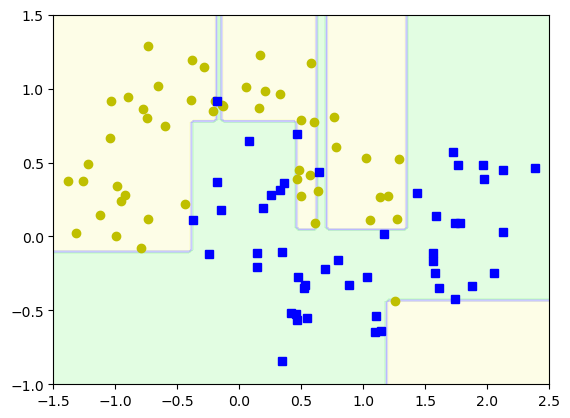

In [22]:
decision_boundaties(tree_clf_no_reg, X, y, axes = [-1.5, 2.5, -1, 1.5])

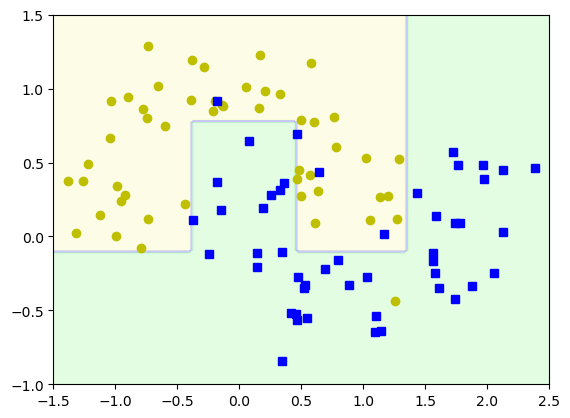

In [23]:
decision_boundaties(tree_clf_reg, X, y, axes = [-1.5, 2.5, -1, 1.5])

In [24]:
angle = pi / 180 * 20
rotation_matrix = [[cos(angle), - sin(angle)], [sin(angle), cos(angle)]]
X_rota = X_iris.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(X_rota, y_iris)

DecisionTreeClassifier(random_state=42)

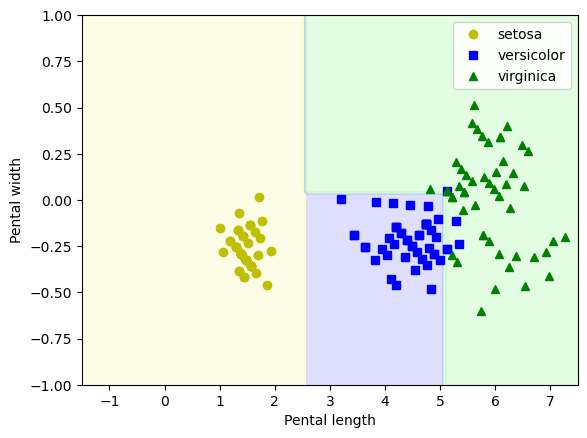

In [25]:
iuplt.xlabel('Pental length')
plt.ylabel('Pental width')
plt.legend()

# Regression

In [28]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

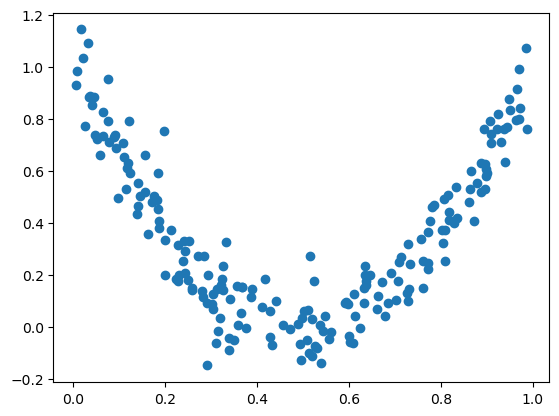

In [29]:
plt.scatter(X,y)

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=2, random_state=42)

In [31]:
export_graphviz(tree_reg, out_file='quadratic_tree_reg.dot',
               rounded=True, filled=True)

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)
def plot_regression_prediction(tree_reg, X, y, axes=[0, 1, -0.2, 1.2]):
    x = np.linspace(axes[0], axes[1], 1000).reshape(-1,1)
    y_pred = tree_reg.predict(x)
    plt.axis(axes)
    plt.xlabel('$x$')
    plt.ylabel('$y$', rotation=0)
    plt.plot(X, y, 'b.')
    plt.plot(x, y_pred, 'r.-', linewidth=2)

Text(0.5, 1.0, 'max_depth=2')

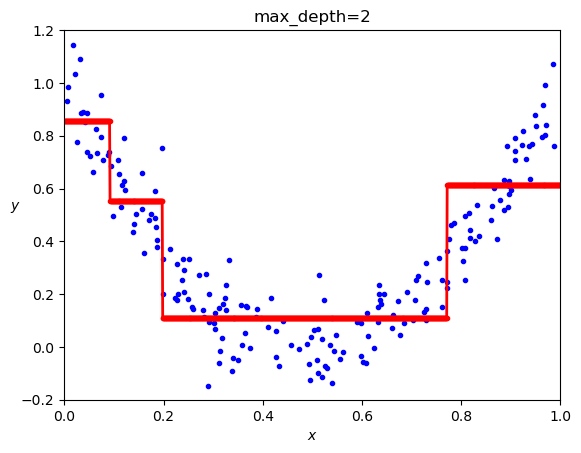

In [33]:
plot_regression_prediction(tree_reg1,X, y)
plt.title('max_depth=2')

Text(0.5, 1.0, 'max_depth=3')

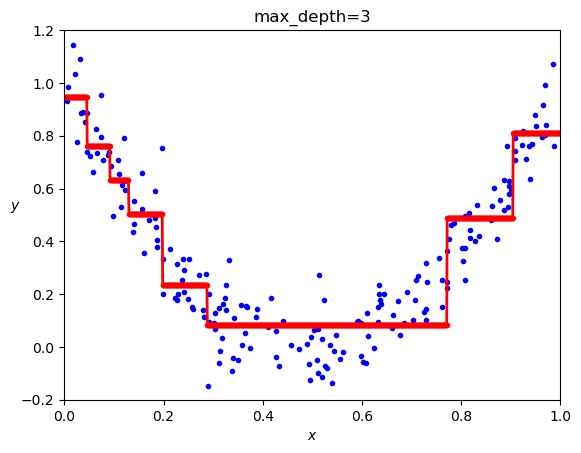

In [34]:
plot_regression_prediction(tree_reg2,X, y)
plt.title('max_depth=3')

In [35]:
tree_reg_no_restric = DecisionTreeRegressor(random_state=42)
tree_reg_no_restric.fit(X, y)

DecisionTreeRegressor(random_state=42)

Text(0.5, 1.0, 'No restriction')

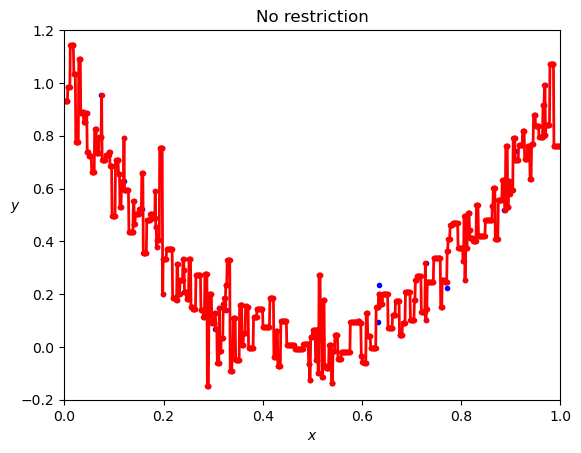

In [36]:
plot_regression_prediction(tree_reg_no_restric, X, y)
plt.title('No restriction')

# Instability

In [37]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

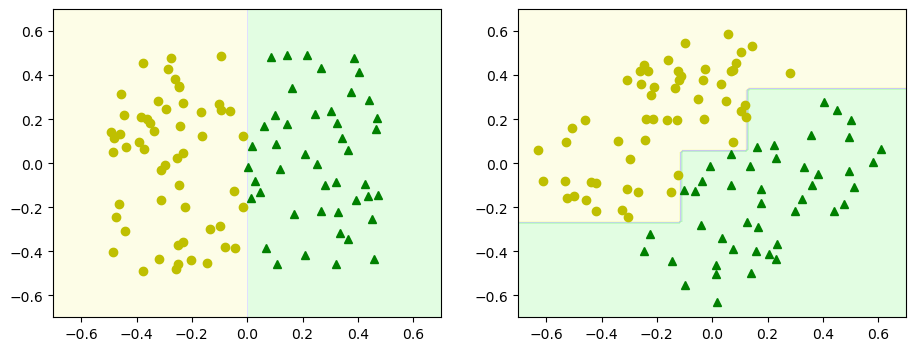

In [38]:
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
decision_boundaties(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7])
plt.subplot(122)
decision_boundaties(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7])

plt.show()

In [39]:
not_widest_versicolor = (X_iris[:, 1]!=1.8) | (y_iris==2)
X_tweaked = X_iris[not_widest_versicolor]
y_tweaked = y_iris[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

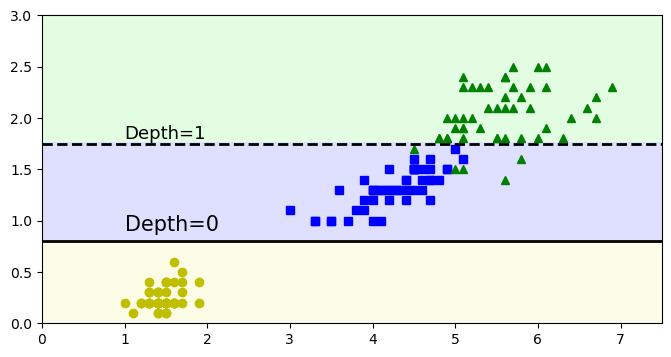

In [40]:
plt.figure(figsize=(8, 4))
decision_boundaties(tree_clf_tweaked, X_tweaked, y_tweaked)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

# Excersise

# 7

In [41]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

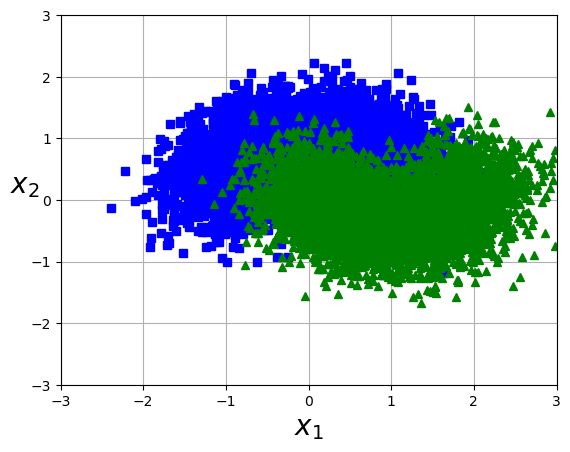

In [42]:
plot_data_set(X, y, [-3, 3, -3, 3])

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

param_grids = [{'max_leaf_nodes': list(range(2, 100)), 'max_depth': list(range(1,10)),
               'min_samples_split': [2, 3, 4]}]

tree_clf = DecisionTreeClassifier(random_state=42)

In [45]:
grid_search = GridSearchCV(tree_clf, param_grids, cv=5, verbose=1,
                          scoring='accuracy')

In [46]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2646 candidates, totalling 13230 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19, 20, 21,
                                             22, 23, 24, 25, 26, 27, 28, 29, 30,
                                             31, ...],
                          'min_samples_split': [2, 3, 4]}],
             scoring='accuracy', verbose=1)

In [47]:
grid_search.best_params_

{'max_depth': 8, 'max_leaf_nodes': 36, 'min_samples_split': 2}

In [48]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=36, random_state=42)

In [49]:
grid_search.best_score_

0.861

In [50]:
tree_clf = DecisionTreeClassifier(**grid_search.best_params_)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=36)

In [51]:
y_pred = tree_clf.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.855

# 8

In [63]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances,
                  random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [64]:
from sklearn.base import clone

forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.7946463333333333

In [65]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [67]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3364\2539803968.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)


In [68]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.8656666666666667